In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eig

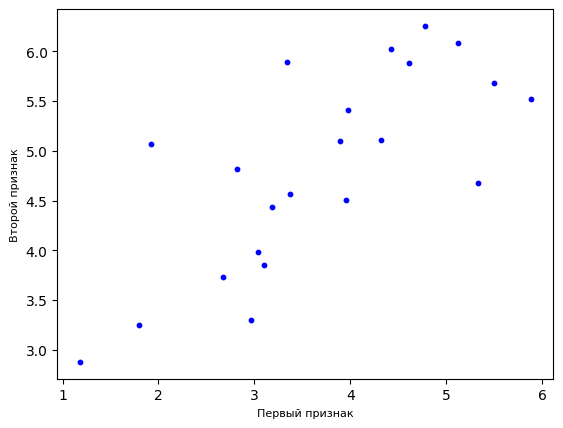

In [ ]:
# 1.1 визуализация данных

path = 'ex_pca_data1.csv'
df = pd.read_csv(path, header=None,
                 names=['Первый признак', 'Второй признак'])

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['Первый признак'], df['Второй признак'], c='blue', s=10)
ax.set_xlabel('Первый признак', fontsize=8)
ax.set_ylabel('Второй признак', fontsize=8)

plt.show()

In [ ]:
# 1.1* нормализация данных

a1 = df['Первый признак'].sum() / df['Первый признак'].count()
a2 = df['Второй признак'].sum() / df['Второй признак'].count()

σ1 = np.sqrt(((df['Первый признак'] - a1) ** 2).sum() / df['Первый признак'].count())
σ2 = np.sqrt(((df['Второй признак'] - a2) ** 2).sum() / df['Второй признак'].count())


df['Первый признак'] = (df['Первый признак'] - a1) / σ1
df['Второй признак'] = (df['Второй признак'] - a2) / σ2

In [ ]:
# 1.2 поиск главных компонент и выборочных дисперсий данных на эти направления, расчет доли сохраненной дисперсии на первую главную компоненту

# задание матрицы X (первый и второй столбцы содержат признаки)

m = df['Первый признак'].size

# расчет корреляционной матрицы

Sigma = 1 / m * np.dot(df.T, df)

In [ ]:
# находим собственные значения и собственные векторы корреляционной матрицы

eigenvalues, eigenvectors = eig(Sigma)

# находим индексы собственных значений в порядке убывания
sorted_indices = np.argsort(eigenvalues)[::-1]

# меняем местами
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
print('Главные компоненты:')
print(eigenvectors)

Главные компоненты:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
print('Выборочные дисперсии данных на эти направления:')
print(eigenvalues.real)

Выборочные дисперсии данных на эти направления:
[1.73017714 0.26982286]


In [ ]:
print('Доля сохраненной дисперсии на первую главную компоненту:')
print((eigenvalues[0] / (eigenvalues.sum())).real)

Доля сохраненной дисперсии на первую главную компоненту:
0.8650885684768527


In [ ]:
# 1.3 получение проекции данных на первую главную компоненту

k = 1
C1 = eigenvectors[:, :k]
print(C1)

[[0.70710678]
 [0.70710678]]


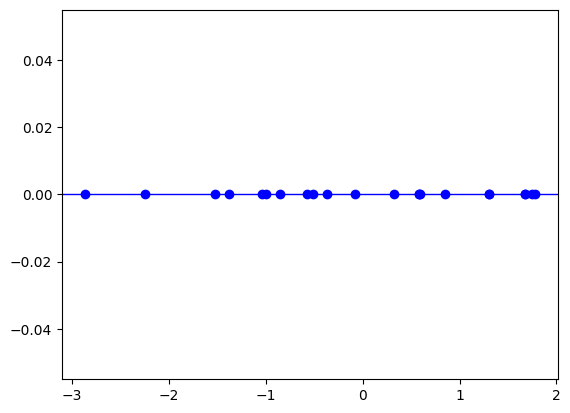

In [ ]:
projections = np.dot(df, C1)
plt.scatter(projections, np.zeros_like(projections), color='blue')
plt.axhline(y=0, linestyle='-', linewidth=1, color='blue')

In [ ]:
# 1.4 получение восстановленных данных по сжатым

reconstructed_data = np.dot(projections, C1.T)

print('Исходные и восстановленные признаки 1 элемента выборки:')
print(np.array(df.iloc[0]), reconstructed_data[0])

Исходные и восстановленные признаки 1 элемента выборки:
[-7.17232221e-01 -5.87586651e-04] [-0.3589099 -0.3589099]


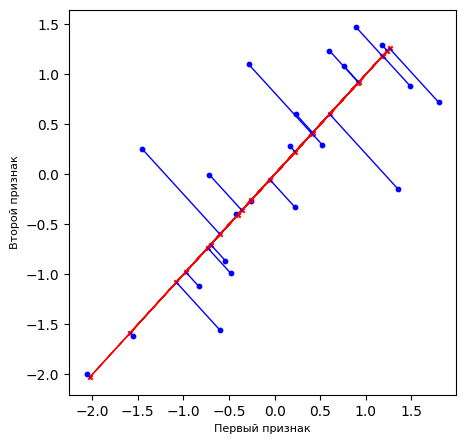

In [ ]:
# 1.5 изображение на графике исходных данных, направления главной компоненты, восстановленных данных

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot()

ax.scatter(df['Первый признак'], df['Второй признак'], c='blue', s=10)

x = reconstructed_data[:, 0]
y = reconstructed_data[:, 1]

ax.scatter(x, y, c='red', s=10, marker='x')
ax.plot(x, y, c='red', linewidth=1)

ax.set_xlabel('Первый признак', fontsize=8)
ax.set_ylabel('Второй признак', fontsize=8)

for i in range(len(x)):
    ax.plot([df['Первый признак'][i], x[i]], [df['Второй признак'][i], y[i]], c='blue', linewidth=1)


plt.show()